In [1]:
import sympy
sympy.init_printing()

Valve equation
==========

Let's linearise the nasty nonlinear term in the equation percentage valve relationship in T4 Problem 4 (or T2 problem 4)

$$ F = \underbrace{C_v \alpha^{x - 1}}_{\text{nonlinear}} $$

First we introduce the requisite symbols. Notice that we specify constraints on these variables, this will make simplifications better later on.

In [2]:
C_v, alpha, x = sympy.symbols('C_v, alpha, x', positive=True)

In [3]:
term = C_v*alpha**(x - 1)

We also introduce a barred versions of the variable. Sympy automatically constructs these to typesetting nicely.

In [4]:
xbar = sympy.symbols('xbar', positive=True)

For single variable expressions, we can use `sympy.series` to linearise for us. Note that he help for `sympy.series` references the help for `sympy.Expr.series`, which has a lot more detail about the operation of this function

In [5]:
sympy.series?

In [6]:
sympy.Expr.series?

Calling series by itself will result in an error term (the one with an $\mathcal{O}$). This is useful to estimate the error of the approximation.

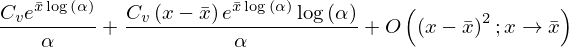

In [7]:
sympy.series(term, x, xbar, 2)

But mostly we will be interested in the expression rather than the error, so we will remove that term with the `removeO` method:

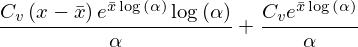

In [8]:
lineq = sympy.series(term, x, xbar, 2).removeO()
lineq

Rewriting in terms of devation variables
--------------

While we are here, we can also rewrite in terms of deviation variables:

In [9]:
xprime = sympy.symbols("x'", positive=True)

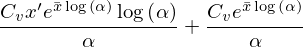

In [10]:
lineq_deviation = lineq.subs({x: xprime + xbar})
lineq_deviation

# A note about simplification

You will note that we specified `positive=True` for all our symbols when we created them. This is because the default assumptions about variables in SymPy are that they are complex. And for complex numbers, `log` is not a 1-to-1 function. See if you understand the following:

In [11]:
xbar, alpha = sympy.symbols('xbar, alpha')
sympy.exp(xbar*sympy.log(alpha)).simplify()

In [12]:
xbar, alpha = sympy.symbols('xbar, alpha', positive=True)
sympy.exp(xbar*sympy.log(alpha)).simplify()

Multiple variables
---------------

Unfortunately, SymPy doesn't have a built-in function for multivariate Taylor series, and consecutive application of the `series` function doesn't do exactly what we want.

In [13]:
variables = x, y, z = sympy.symbols('x, y, z')
bars = xbar, ybar, zbar = sympy.symbols('xbar, ybar, zbar')

In [14]:
term = x*y*z

Note that the other variables are assumed to be constant here, so we don't recover the answer we are looking for.

In [15]:
term.series(x, xbar, 2).removeO().series(y, ybar, 2).removeO()

The function `tbcontrol.symbolic.linearise` calculates a multivariable linearisation using the textbook formula. Note that it does not handle expressions which include derivatives or equalities, so don't try to pass a full equation, just use it for the nonlinear terms.

In [16]:
import tbcontrol.symbolic

In [17]:
bars, linearexpression = tbcontrol.symbolic.linearise(term, variables)
linearexpression